In [145]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import RandomOverSampler

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [146]:
# Lectura del dataset 
data = pd.read_csv('Churn_Modelling.csv')
# Visualización inicial del conjunto de datos
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Análisis exploratorio de los datos

In [147]:
# Visualizamos la información básica del conjunto de datos
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [148]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data.shape

(10000, 14)

In [149]:
# Validación de datos duplicados
data.duplicated().sum()

0

In [150]:
# Número de datos ausentes por variable
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [151]:
#Eliminación de datos que son irrelevantes y que podrian afectar los resultado.
df = data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [152]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [153]:
# Visualización de la información estadística del conjunto de datos
# Para las variables cualitativas o categóricas 
df.select_dtypes(include=['object']).describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [154]:
# Validación de la correlación entre las variables de entrada con relación a la variable de salida.
corr_matrix = df.corr()
corr_matrix["Exited"].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

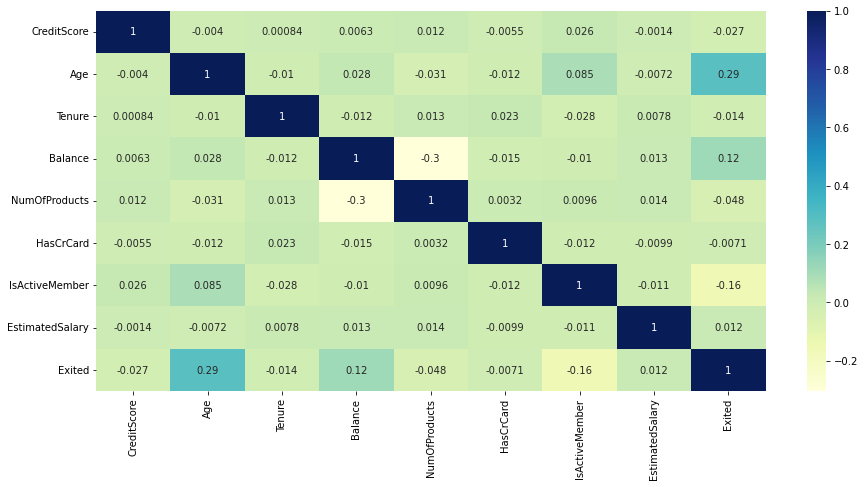

In [155]:
# Validamos correlaciones
correlation = df.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

In [156]:
#Validación de la cantidad de ejemplos que posee el dataset segun la variable de salida.
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Análisis exploratorio de los datos

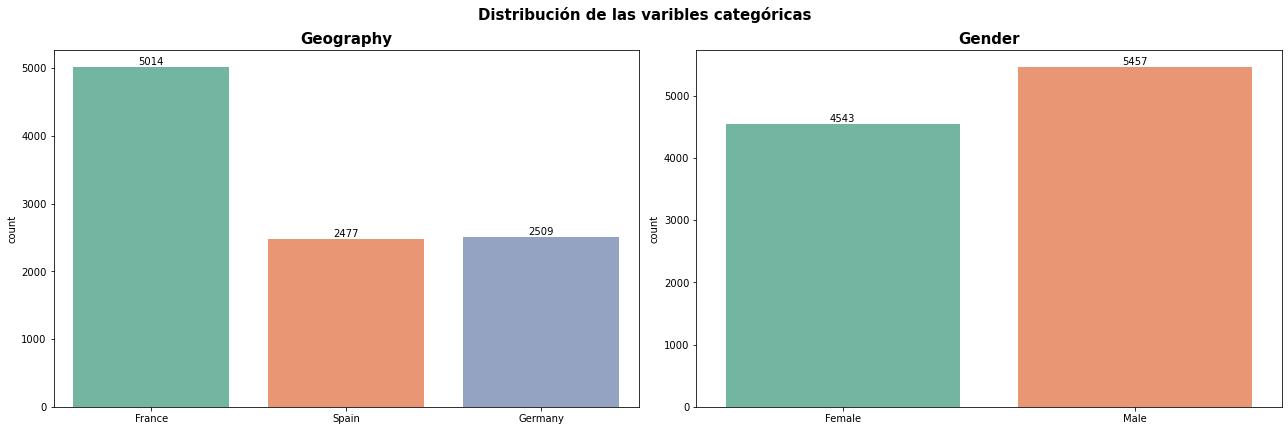

In [157]:
# Gráficas de distribución para cada variable categórica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_object = df.select_dtypes(include=['object']).columns
# Recorremos cada columna seleccionada
for i, colum in enumerate(columnas_object):
    # Gráficamos cada columna 
    ax = sns.countplot(data = df, x =colum , ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    for columna in ax.containers:
        ax.bar_label(columna)
# Se eliminan los axes vacíos
#for i in [2]:
#   fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.89)
fig.suptitle('Distribución de las varibles categóricas',
             fontsize = 15, fontweight = "bold", x =0.5, y= 0.99);

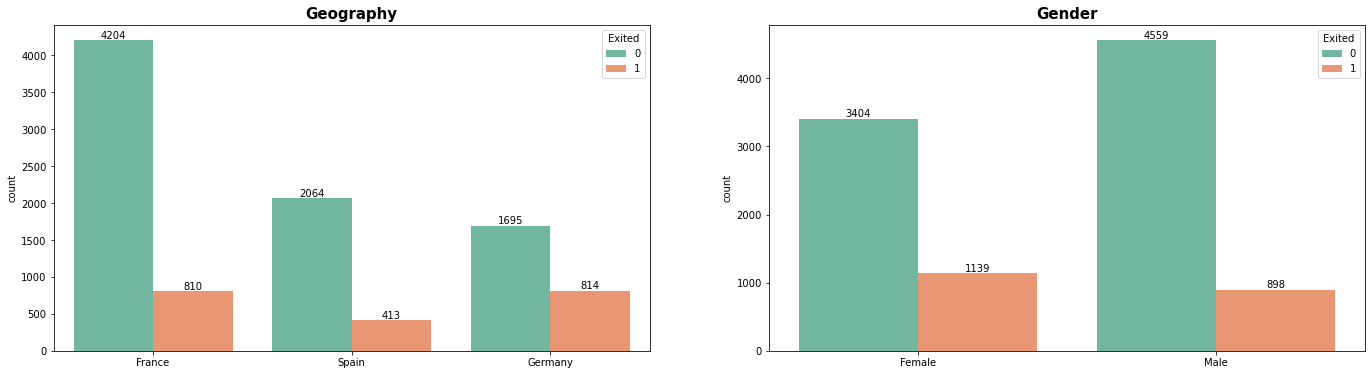

In [158]:
# Gráficas de distribución para cada variable categórica en base a la variable de salida "Exited"
# Seleccionamos el tipo de variable a gráficar
columnas_object = df.select_dtypes(include=['object']).columns
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23.5, 6))
axes = axes.flat
plt.subplots_adjust(hspace=0.5)
# Recorremos cada columna seleccionada
for i, colum in enumerate(columnas_object):
    ax = sns.countplot(data = df, x =colum , hue = 'Exited', ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    for columna in ax.containers:
        ax.bar_label(columna)

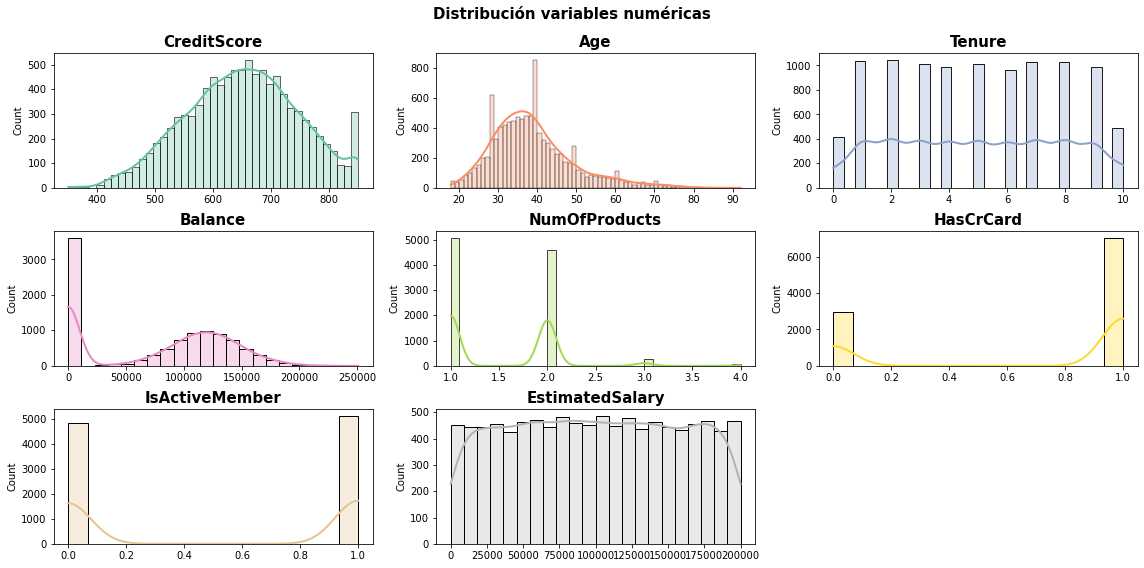

In [159]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('Exited')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 15, fontweight = "bold");

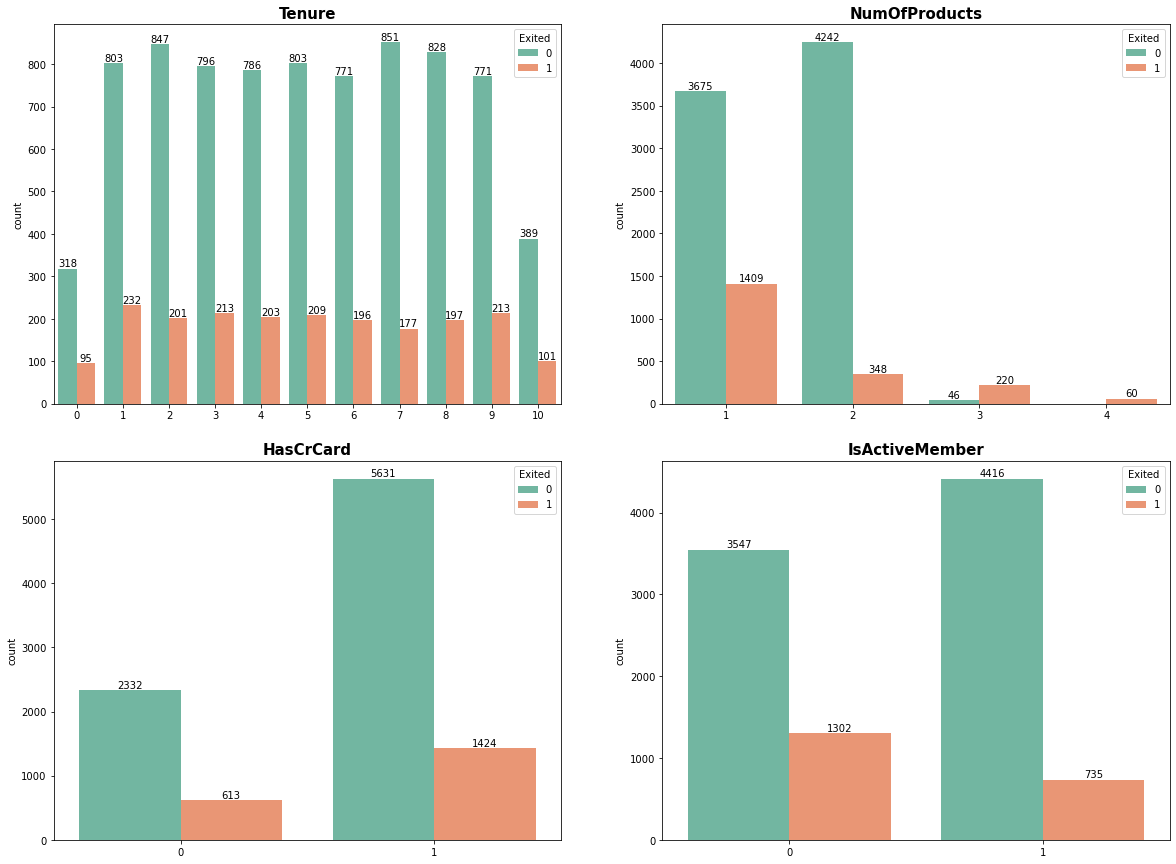

In [160]:
# Gráficas de distribución de las varibles númericas en base a la varible de salida "Exited"
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
# Se elimina las variables con cantidades continuas, asi como la variable de salida
columnas_numeric = columnas_numeric.drop('Exited')
columnas_numeric = columnas_numeric.drop('CreditScore')
columnas_numeric = columnas_numeric.drop('Age')
columnas_numeric = columnas_numeric.drop('Balance')
columnas_numeric = columnas_numeric.drop('EstimatedSalary')
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
axes = axes.flat
plt.subplots_adjust(hspace=0.15)
# Recorremos cada columna seleccionada
for i, colum in enumerate(columnas_numeric):
    ax = sns.countplot(data = df, x =colum , hue = 'Exited', ax=axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    for columna in ax.containers:
        ax.bar_label(columna)

<Figure size 432x288 with 0 Axes>

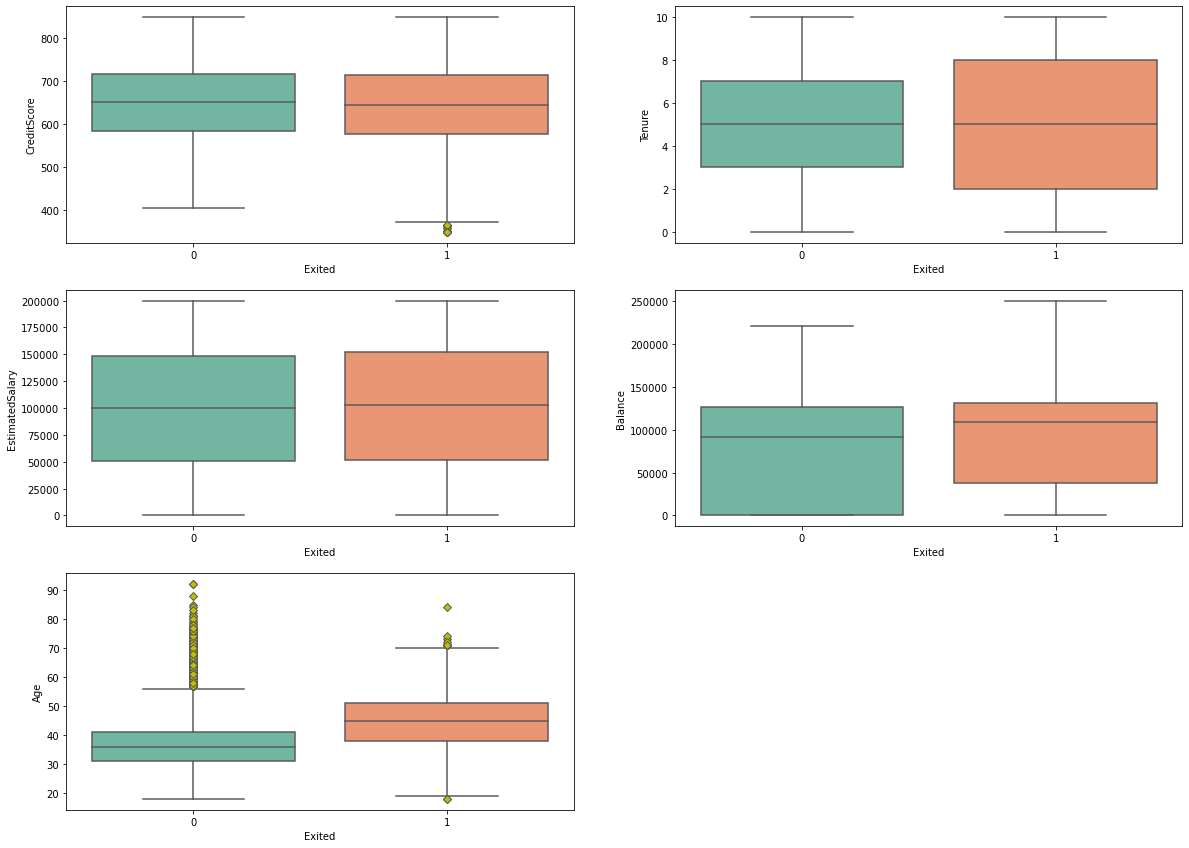

In [161]:
# Boxplot for class
den=pd.DataFrame(df)
plt.figure (1)
plt.subplots(figsize=(20,20))
green_diamond = dict(markerfacecolor='y', marker='D')
sns.set_palette("Set2")

plt.subplot(421)
sns.boxplot(x='Exited', y='CreditScore', data=den, flierprops=green_diamond)

plt.subplot(422)
sns.boxplot(x='Exited', y='Tenure', data=den, flierprops=green_diamond)

plt.subplot(423)
sns.boxplot(x='Exited', y='EstimatedSalary', data=den, flierprops=green_diamond)

plt.subplot(424)
sns.boxplot(x='Exited', y='Balance', data=den, flierprops=green_diamond)

plt.subplot(425)
sns.boxplot(x='Exited', y='Age', data=den, flierprops=green_diamond)

plt.show() 

La variable número de productos tiene una distribución mayoritaria en 1 y 2 productos mientras que los valores 3 y 4 tienen muy pocos datos, por lo que sera transformada a variable cualitativa para agrupar 3 y 4 en un mismo tipo y asi evitar que esta clase tenga un desequilibrio, que podria afectar los resultados mas adelante.

In [162]:
# Conversión de la variable número de productos a tipo string
df.NumOfProducts = df.NumOfProducts.astype("str")

In [163]:
# Conteo de valores para la variable Número de productos
df.NumOfProducts.value_counts().sort_index()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [164]:
#Reagrupación de la variable número de productos
dic_replace = {'3': "3_mas",
               '4': "3_mas"}

df['NumOfProducts'] = (
    df['NumOfProducts']
    .map(dic_replace) 
    .fillna(df['NumOfProducts'])
)

In [165]:
# Conteo de valores para la variable número de productos con los cambios aplicados
df.NumOfProducts.value_counts().sort_index()

1        5084
2        4590
3_mas     326
Name: NumOfProducts, dtype: int64

## Balanceo del dataset

In [166]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df = df.drop("Exited", axis=1)
y_df = df["Exited"].copy()

In [167]:
# Validamos la cantidad de casos de personas que han abandonado o no la institución bancaria
# Con esto podemos verificar si nuestro dataset esta desbalanceado y necesita que apliquemos alguna técnica de balanceo de datos. 
no = y_df.sum()
si = y_df.shape[0]- no
print('Personas que no se fueron:',si,'Personas que si se fueron:', no)

Personas que no se fueron: 7963 Personas que si se fueron: 2037


El conjunto de datos posee un desbalance con 7963 clientes que se quedan en el banco y 2037 que se van del banco, al entrenar los diferentes algoritmos generaria una matriz de confusión desbalanceda, por lo que se hara uso de la técnica de sobremuestreo para equilibrar la cantidad de datos por clase.

In [168]:
# https://imbalanced-learn.org/dev/over_sampling.html
# Inicializamos el método de sobremuestreo
Ros = RandomOverSampler()#random_state = 0
# Este método duplica muestras de la clase menos representada
X_Ros, y_Ros = Ros.fit_resample(X_df, y_df)
# Hacemos un nuevo recuento para validar la cantidad de datos por cada caso
No_Ros = y_Ros.sum()
Si_Ros = y_Ros.shape[0]- No_Ros
print('Personas que no se fueron:', No_Ros ,'Personas que si se fueron:', Si_Ros)
# Visualizamos el dataset equilibrado para ambos casos 
X_Ros

Personas que no se fueron: 7963 Personas que si se fueron: 7963


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3_mas,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
15921,642,Germany,Male,49,4,120688.61,1,1,0,24770.22
15922,850,Spain,Male,48,2,0.00,1,1,0,169425.30
15923,688,Spain,Female,33,2,0.00,1,0,0,27557.18
15924,602,Germany,Female,26,8,113674.20,1,1,0,197861.16


## Escalado de los datos

In [169]:
# Separamos las columnas numéricas para escalarlas
colum_scal = X_Ros[["CreditScore", "Age", "Balance", "EstimatedSalary"]]
colum_scal

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10
...,...,...,...,...
15921,642,49,120688.61,24770.22
15922,850,48,0.00,169425.30
15923,688,33,0.00,27557.18
15924,602,26,113674.20,197861.16


In [170]:
# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(colum_scal)

In [171]:
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=colum_scal.columns, index=colum_scal.index)
# Visualización de los cambios
X_scaled

,CreditScore,Age,Balance,EstimatedSalary
0,-0.312202,0.081198,-1.333650,0.018739
1,-0.425219,-0.013269,0.030620,0.212741
2,-1.514283,0.081198,1.265395,0.236814
3,0.509733,-0.202202,-1.333650,-0.111631
4,2.061137,0.175664,0.709483,-0.367139
...,...,...,...,...
15921,-0.075896,0.742464,0.630985,-1.308472
15922,2.061137,0.647997,-1.333650,1.198595
15923,0.396717,-0.769002,-1.333650,-1.260170
15924,-0.486864,-1.430268,0.516801,1.691427


In [172]:
# Transformación de las columnas categoricas a numericas
# Seleccionamos las columnas que deben ser transformadas
df_new = pd.get_dummies(X_Ros, columns=['Geography','Gender','NumOfProducts'], drop_first=True)
# Visualizamos los cambios aplicados
df_new

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3_mas
0,619,42,2,0.00,1,1,101348.88,0,0,0,0,0
1,608,41,1,83807.86,0,1,112542.58,0,1,0,0,0
2,502,42,8,159660.80,1,0,113931.57,0,0,0,0,1
3,699,39,1,0.00,0,0,93826.63,0,0,0,1,0
4,850,43,2,125510.82,1,1,79084.10,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,642,49,4,120688.61,1,0,24770.22,1,0,1,0,0
15922,850,48,2,0.00,1,0,169425.30,0,1,1,0,0
15923,688,33,2,0.00,0,0,27557.18,0,1,0,0,0
15924,602,26,8,113674.20,1,0,197861.16,1,0,0,0,0


In [173]:
# Pasar las características transformadas al dataset original
# Eliminamos las columnas del dataset original 
df_new2 = df_new.drop(["CreditScore", "Age", "Balance", "EstimatedSalary"], axis=1)
# Visualizamos los cambios aplicados
df_new2

,Tenure,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3_mas
0,2,1,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0
2,8,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0
4,2,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
15921,4,1,0,1,0,1,0,0
15922,2,1,0,0,1,1,0,0
15923,2,0,0,0,1,0,0,0
15924,8,1,0,1,0,0,0,0


In [174]:
# Concatenamos el dataset sin las caraterísticas transformadas y el dataset de las característica transformadas
df_new3 = pd.concat([df_new2,X_scaled], axis=1,sort=True)
# Visualizamos los cambios aplicados
df_new3

,Tenure,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3_mas,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,0,0,0,0,0,-0.312202,0.081198,-1.333650,0.018739
1,1,0,1,0,1,0,0,0,-0.425219,-0.013269,0.030620,0.212741
2,8,1,0,0,0,0,0,1,-1.514283,0.081198,1.265395,0.236814
3,1,0,0,0,0,0,1,0,0.509733,-0.202202,-1.333650,-0.111631
4,2,1,1,0,1,0,0,0,2.061137,0.175664,0.709483,-0.367139
...,...,...,...,...,...,...,...,...,...,...,...,...
15921,4,1,0,1,0,1,0,0,-0.075896,0.742464,0.630985,-1.308472
15922,2,1,0,0,1,1,0,0,2.061137,0.647997,-1.333650,1.198595
15923,2,0,0,0,1,0,0,0,0.396717,-0.769002,-1.333650,-1.260170
15924,8,1,0,1,0,0,0,0,-0.486864,-1.430268,0.516801,1.691427


In [175]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división del dataset
data_clean= pd.concat([df_new3,y_Ros], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean

,Tenure,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3_mas,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,0,0,0,0,0,-0.312202,0.081198,-1.333650,0.018739,1
1,1,0,1,0,1,0,0,0,-0.425219,-0.013269,0.030620,0.212741,0
2,8,1,0,0,0,0,0,1,-1.514283,0.081198,1.265395,0.236814,1
3,1,0,0,0,0,0,1,0,0.509733,-0.202202,-1.333650,-0.111631,0
4,2,1,1,0,1,0,0,0,2.061137,0.175664,0.709483,-0.367139,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,4,1,0,1,0,1,0,0,-0.075896,0.742464,0.630985,-1.308472,1
15922,2,1,0,0,1,1,0,0,2.061137,0.647997,-1.333650,1.198595,1
15923,2,0,0,0,1,0,0,0,0.396717,-0.769002,-1.333650,-1.260170,1
15924,8,1,0,1,0,0,0,0,-0.486864,-1.430268,0.516801,1.691427,1


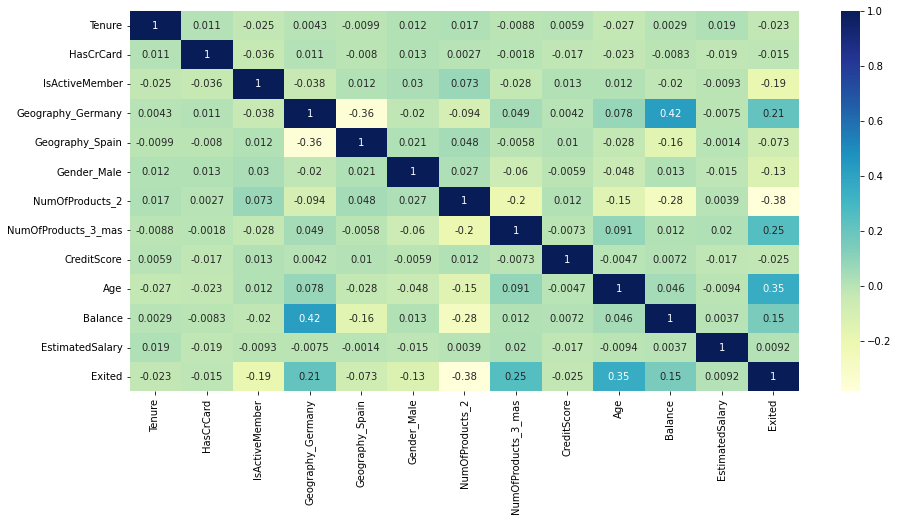

In [176]:
# Validamos correlaciones 
correlation = data_clean.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

## División del conjunto de datos

In [177]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [178]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(data_clean, stratify='Exited')

In [179]:
#Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 9555
Longitud del Validation Set: 3185
Longitud del Test Set: 3186


In [180]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Exited", axis=1)
y_train = train_set["Exited"].copy()

In [181]:
# Conjunto de datos de pruebas
X_val = val_set.drop("Exited", axis=1)
y_val = val_set["Exited"].copy()

In [182]:
# Conjunto de datos de test
X_test = test_set.drop("Exited", axis=1)
y_test = test_set["Exited"].copy()

## Selección de los mejores modelos

In [183]:
# Pruebas de con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Evaluación de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 76.12% (1.04%)
SVM: 78.13% (1.21%)
KNeighbors: 78.76% (1.23%)
GaussianNB: 68.85% (1.49%)
BernoulliNB: 75.37% (1.35%)
Decision Tree: 88.37% (1.18%)
Random Forest: 92.31% (0.69%)
Ada Boost: 77.66% (1.25%)


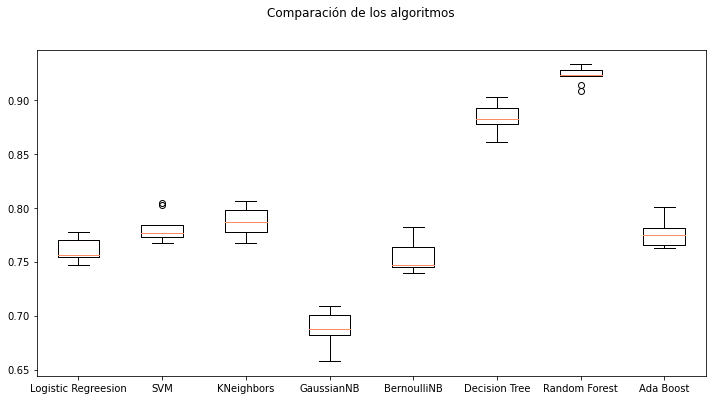

In [184]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig = plt.figure(figsize =(12,6))
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [185]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters1 = {"n_neighbors" : [1,3,5],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_KNN, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [186]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters2 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'log2',
 'splitter': 'best'}

In [187]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters3 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros

grid_result3.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 1}

## Evaluación del mejor modelo

In [188]:
# Comparación de modelos con los resultados de la búsqueda de los mejores parámetros 
models_hiper = []
models_hiper.append(['KNeighbors', KNeighborsClassifier(**grid_result1.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])

# Evaluación de los diferentes modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

KNeighbors: 88.16% (1.38%)
Decision Tree: 88.25% (0.78%)
Random Forest: 93.52% (0.87%)


In [189]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.9463108320251178

In [190]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluacion el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.9428750784682988

## Reducción de características

In [191]:
# Selección de las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), mejor_modelo.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(8)

Age                    0.230931
EstimatedSalary        0.156141
CreditScore            0.152504
Balance                0.147806
Tenure                 0.089104
NumOfProducts_2        0.088695
NumOfProducts_3_mas    0.036193
IsActiveMember         0.032518
dtype: float64

In [192]:
# Extraemos las 3 características con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(8).index)
columns

['Age',
 'EstimatedSalary',
 'CreditScore',
 'Balance',
 'Tenure',
 'NumOfProducts_2',
 'NumOfProducts_3_mas',
 'IsActiveMember']

In [193]:
# Aplicamos la reducción de características al dataset de entrenamiento y pruebas
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()
X_test_reduced = X_test[columns].copy()
X_train_reduced.head(3)

,Age,EstimatedSalary,CreditScore,Balance,Tenure,NumOfProducts_2,NumOfProducts_3_mas,IsActiveMember
5900,-1.335802,1.089202,-0.682073,-1.333650,4,0,1,0
12999,-1.524735,-1.087086,0.201507,1.235894,1,0,0,0
2615,2.064997,-0.262858,-1.678670,0.245518,9,0,0,1


## Prueba del modelo final 

In [194]:
# Probamos el modelo nuevamente con el dataset reducido 
# Inicializamos el modelo 
mejor_modelo2 = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo2.fit(X_train_reduced,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred3 = mejor_modelo2.predict(X_val_reduced)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred3)

0.9362637362637363

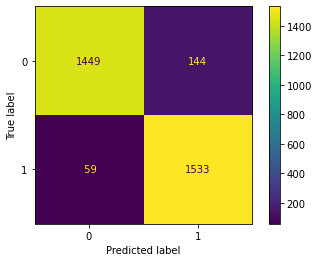

In [195]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo2, X_val_reduced, y_val, values_format='3g')

In [196]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1593
           1       0.91      0.96      0.94      1592

    accuracy                           0.94      3185
   macro avg       0.94      0.94      0.94      3185
weighted avg       0.94      0.94      0.94      3185



In [197]:
# Realizamos una nueva predición con los datos de test
y_pred4 = mejor_modelo2.predict(X_test_reduced)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred4)

0.9356559949780289

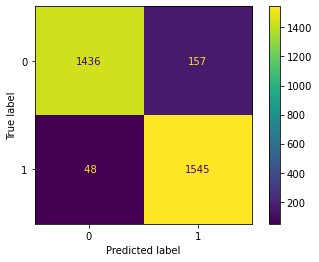

In [198]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo2, X_test_reduced, y_test, values_format='3g')

In [199]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1593
           1       0.91      0.97      0.94      1593

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186

